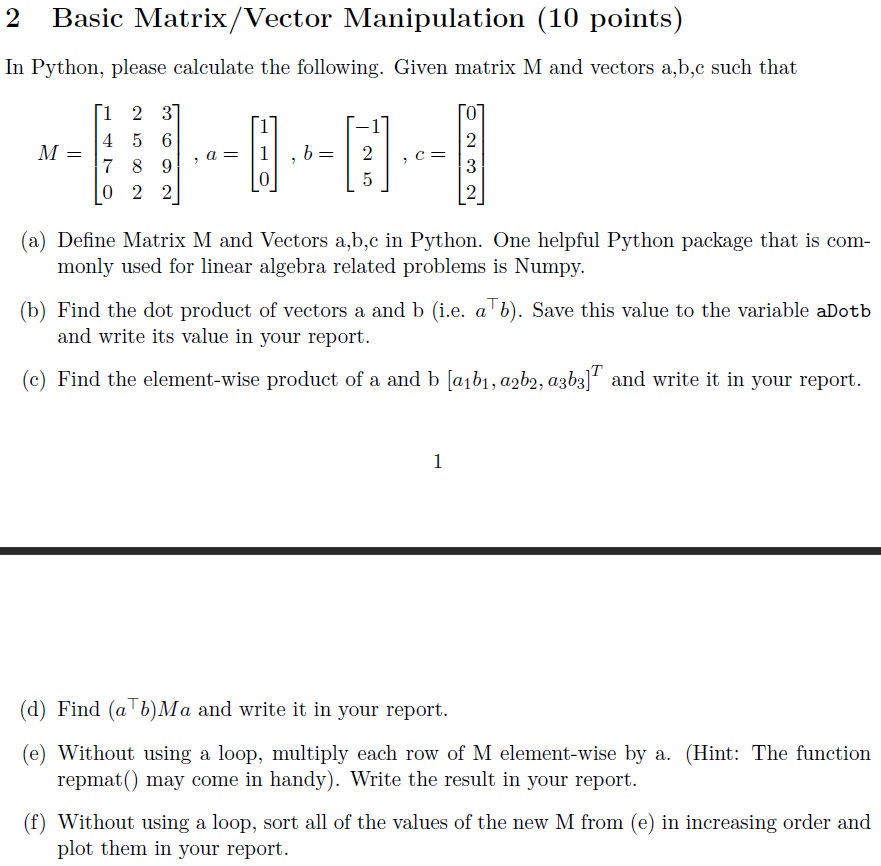

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

In [2]:
M = np.array([[1,2,3],[4,5,6],[7,8,9],[0,2,2]])
a = np.array([1,1,0])
b = np.array([-1,2,5])
c = np.array([0,2,3,2])

In [3]:
aDotb = a.dot(b)
print('aDotb =', aDotb)

In [4]:
aEb = a*b
print('aEb =', aEb)

In [5]:
aTbMa = a.T.dot(b)*M.dot(a)
print('aTbMa =', aTbMa)

aTbMa = [ 3  9 15  2]


In [6]:
M.shape

(4, 3)

In [7]:
amat = np.matlib.repmat(a,M.shape[0],1)
MEa = M*amat
print('MEa =', MEa)

MEa = [[1 2 0]
 [4 5 0]
 [7 8 0]
 [0 2 0]]


In [8]:
MEaSorted = np.sort(MEa,axis = None)
MEaSorted

array([0, 0, 0, 0, 0, 1, 2, 2, 4, 5, 7, 8])

In [9]:
x = range(len(MEaSorted))

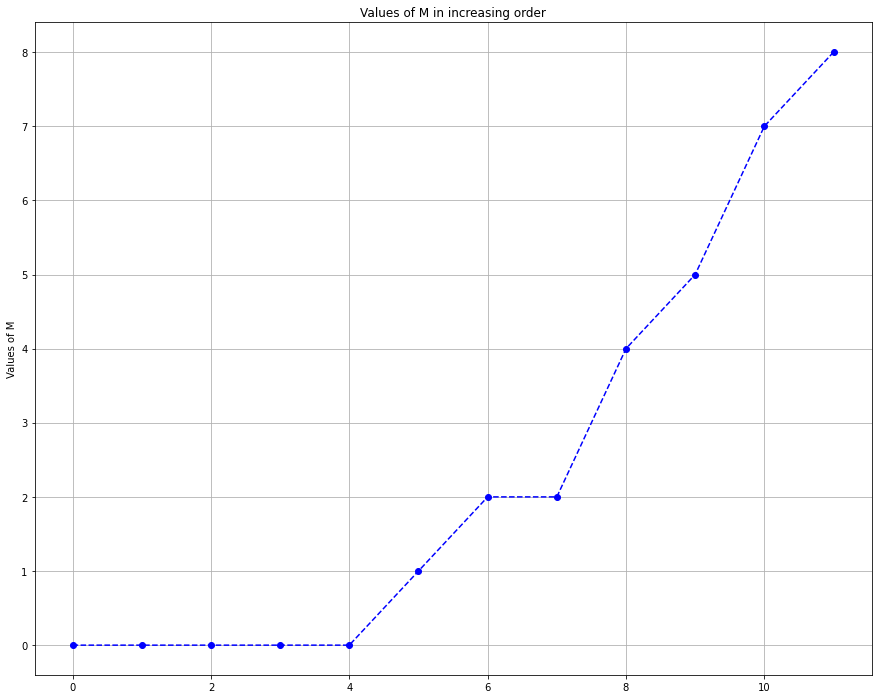

In [10]:
plt.plot(x,MEaSorted,'bo--')
plt.ylabel("Values of M")
plt.title("Values of M in increasing order")
plt.grid(True)
plt.show()

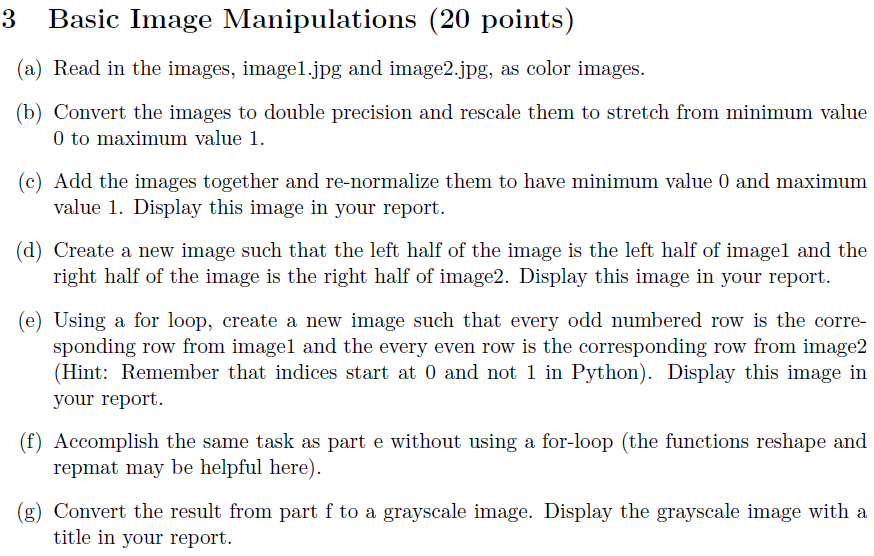

In [11]:
image1 = plt.imread('image1.jpg')
image2 = plt.imread('image2.jpg')

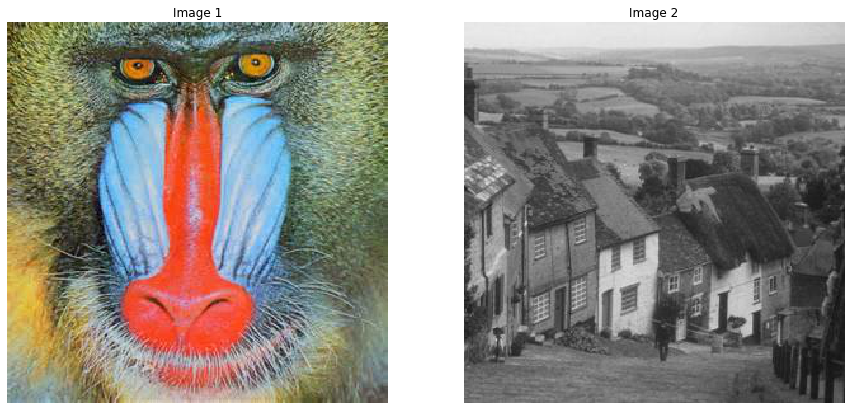

In [12]:
plt.subplot(1,2,1)

plt.axis('off')
plt.title('Image 1')
plt.imshow(image1)

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Image 2')
plt.imshow(image2)
plt.show()

In [13]:
image1 = image1.astype('float')
image2 = image2.astype('float')
image1 = (image1 - image1.min())/(image1.max() - image1.min())
image2 = (image2 - image2.min())/(image2.max() - image2.min())

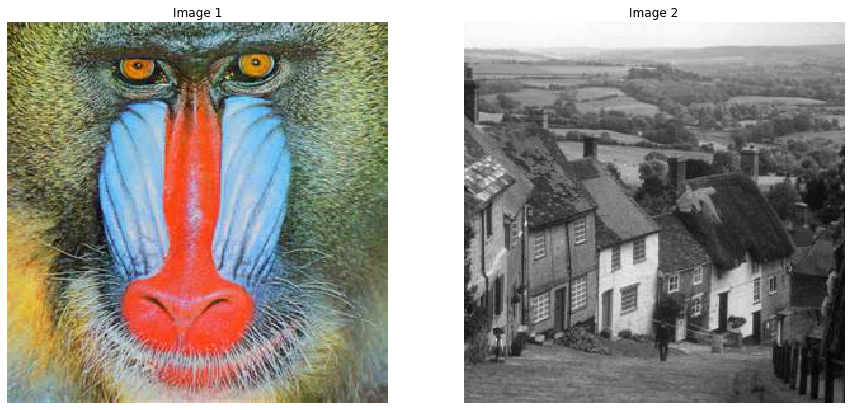

In [14]:
plt.subplot(1,2,1)

plt.axis('off')
plt.title('Image 1')
plt.imshow(image1)

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Image 2')
plt.imshow(image2)
plt.show()

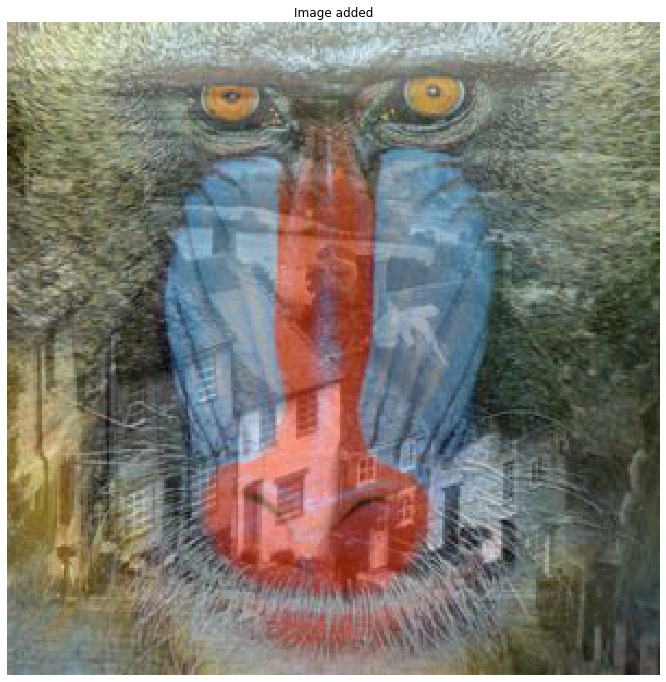

In [15]:
image = image1 + image2
image = (image - image.min())/(image.max() - image.min())
plt.axis('off')
plt.title('Image added')
plt.imshow(image)
plt.show()

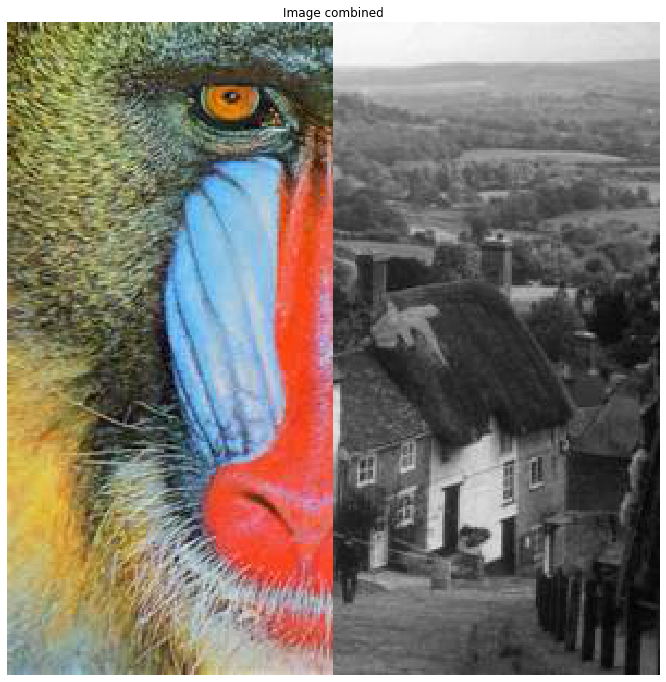

In [16]:
image1Left = image1[:,:image1.shape[1]//2,:]
image2Right = image2[:,image2.shape[1]//2:,:]
newImage = np.concatenate((image1Left,image2Right),axis = 1)
plt.axis('off')
plt.title('Image combined')
plt.imshow(newImage)
plt.show()

In [17]:
image1.shape[0],image2.shape[0]

(300, 300)

In [18]:
image1.shape[0]

300

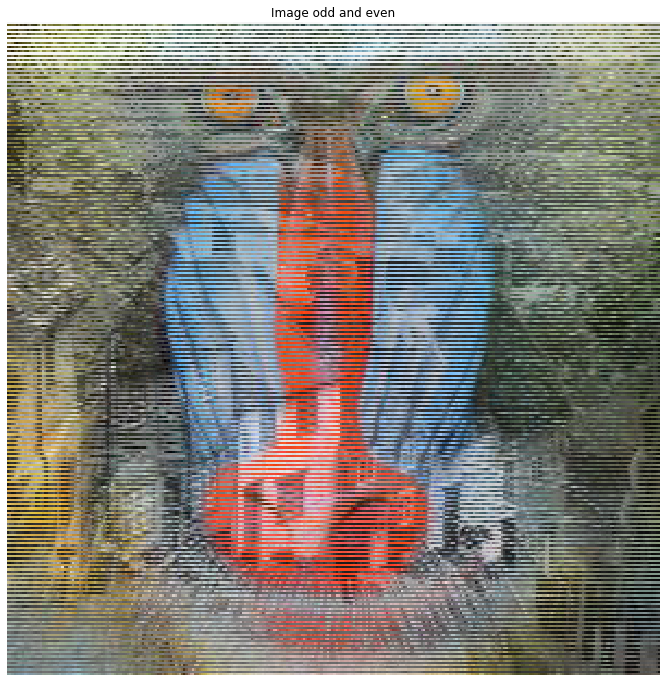

In [19]:
newImage1 = np.zeros(image1.shape)
for i in range(image1.shape[0]):
    if (i+1) % 2 == 0:
#         print(i)
        newImage1[i] = image1[i]
    else:
#         print('i',i)
        newImage1[i] = image2[i]
plt.axis('off')
plt.title('Image odd and even')
plt.imshow(newImage1)
plt.show()

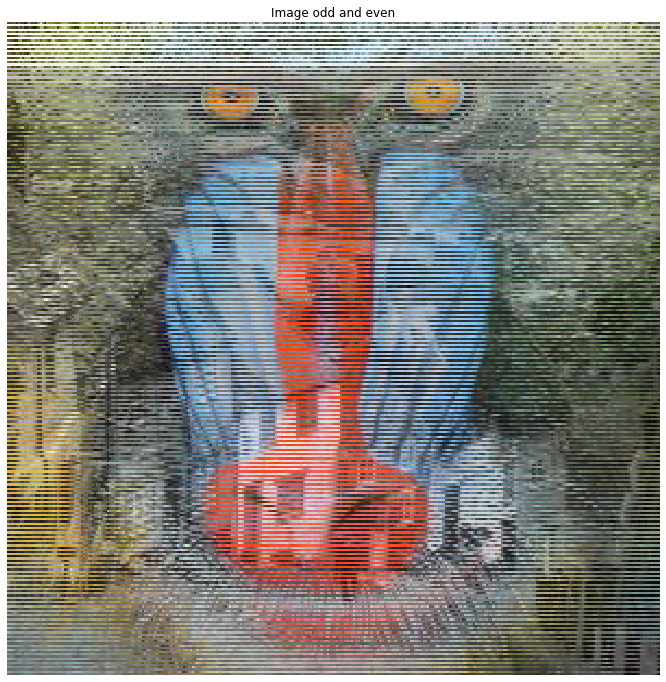

In [22]:
img1_reshaped = image1.reshape(image1.shape[0]//2, image1.shape[1]*2, -1)
img2_reshaped = image2.reshape(image2.shape[0]//2, image2.shape[1]*2, -1)
newImage2 = np.concatenate((img1_reshaped[:, :image1.shape[1], :], img2_reshaped[:, image1.shape[1]:, :]), axis=1)
newImage2 = newImage2.reshape(image1.shape)
plt.axis('off')
plt.title('Image odd and even')
plt.imshow(newImage2)
plt.show()

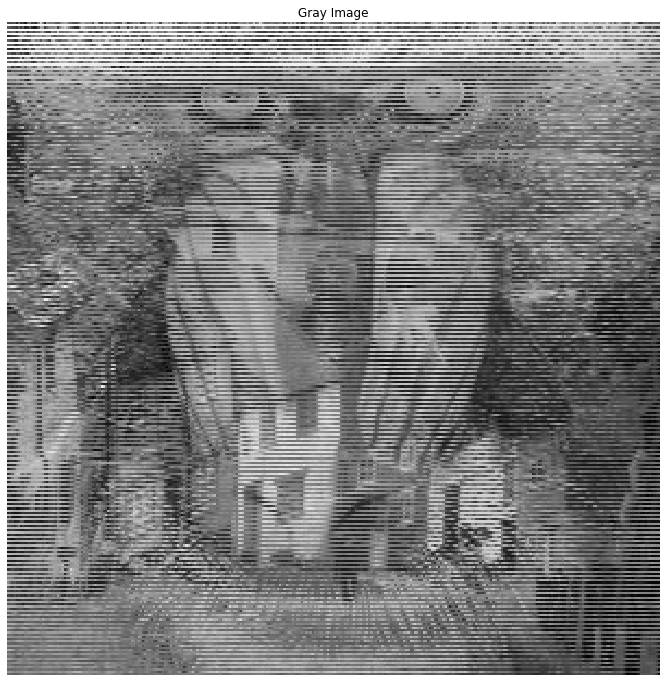

In [25]:
grayImage = newImage2.dot(np.array([0.299,0.587,0.114]))
plt.axis('off')
plt.title('Gray Image')
plt.imshow(grayImage,cmap='gray')
plt.show()

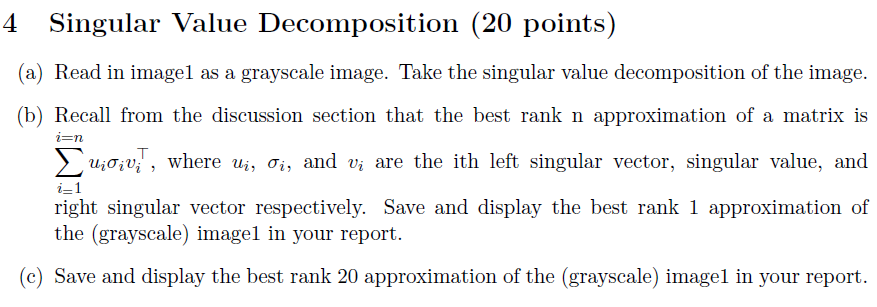

In [28]:
from skimage import color
from skimage import io
img1 = color.rgb2gray(io.imread('image1.jpg'))

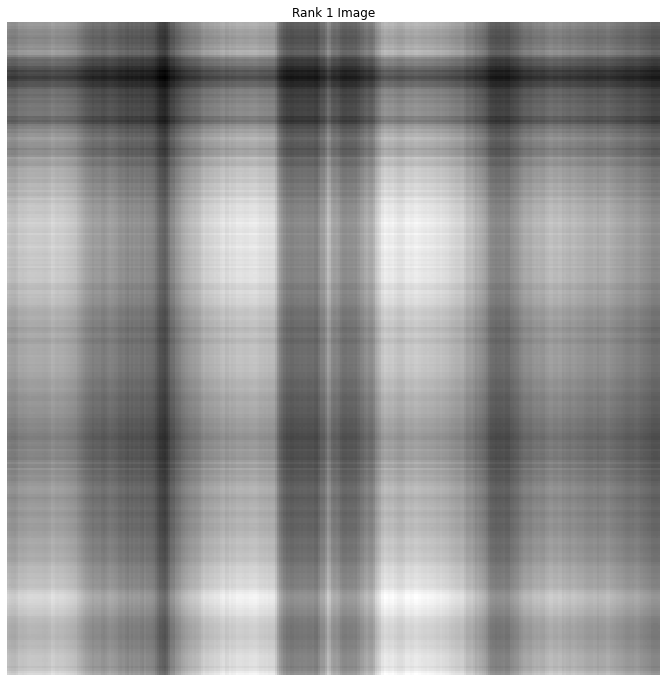

In [43]:
U,s,V = np.linalg.svd(img1)
U1 = U[:,0].reshape(img1.shape[0],1)
s1 = s[0]
V1 = V[0,:].reshape(1,img1.shape[1])
img1Rank1 = U1.dot(s1).dot(V1)
plt.axis('off')
plt.title('Rank 1 Image')
plt.imshow(img1Rank1,cmap='gray')
plt.show()

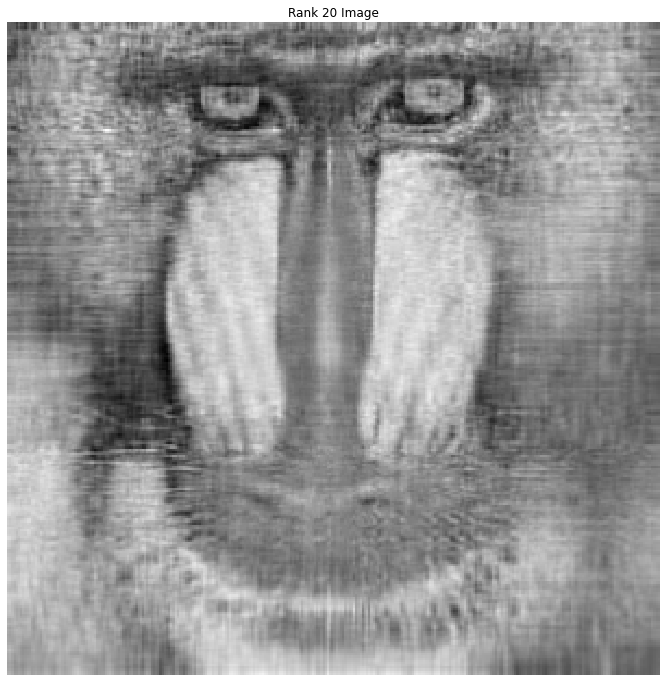

In [46]:
U20 = U[:,:20].reshape(img1.shape[0],20)
s20 = np.diag(s[:20])
V20 = V[:20,:].reshape(20,img1.shape[1])
img1Rank20 = U20.dot(s20).dot(V20)
plt.axis('off')
plt.title('Rank 20 Image')
plt.imshow(img1Rank20,cmap='gray')
plt.show()